In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Extract the Data from Excel

In [2]:
df = pd.read_excel("FAOSTAT_data.xlsx")

# Data Cleaning

In [3]:
# Pivot the dataframe to get separate columns for Area harvested, Yield, and Production
df_pivot = df.pivot_table(index=['Domain', 'Area Code (M49)', 'Area', 'Item Code (CPC)', 'Item', 'Year Code', 'Year'],
                              columns='Element',
                              values='Value',
                              aggfunc='first').reset_index()

# Flatten the multi-level columns
df_pivot.columns = [col if isinstance(col, str) else col[1] for col in df_pivot.columns]

# The dataframe now has separate columns for Area harvested, Yield, and Production
print(df_pivot.head())

                         Domain  Area Code (M49)         Area Item Code (CPC)  \
0  Crops and livestock products                4  Afghanistan               0   
1  Crops and livestock products                4  Afghanistan               0   
2  Crops and livestock products                4  Afghanistan             111   
3  Crops and livestock products                4  Afghanistan             111   
4  Crops and livestock products                4  Afghanistan             111   

     Item  Year Code  Year  Area harvested  Laying  Milk Animals  \
0  Grapes       2019  2019             NaN     NaN           NaN   
1  Grapes       2021  2021             NaN     NaN           NaN   
2   Wheat       2019  2019       2334000.0     NaN           NaN   
3   Wheat       2020  2020       2668000.0     NaN           NaN   
4   Wheat       2021  2021       2046564.0     NaN           NaN   

   Producing Animals/Slaughtered  Production  Stocks    Yield  \
0                            NaN   1112

In [4]:
df_pivot.isnull().sum()

Domain                               0
Area Code (M49)                      0
Area                                 0
Item Code (CPC)                      0
Item                                 0
Year Code                            0
Year                                 0
Area harvested                   44524
Laying                           91360
Milk Animals                     90315
Producing Animals/Slaughtered    74860
Production                       10481
Stocks                           83821
Yield                            41851
Yield/Carcass Weight             86116
dtype: int64

In [5]:
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2019,2019,ha,29203.00,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2019,2019,kg/ha,1308.30,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,1371,"Almonds, in shell",2019,2019,t,38205.00,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,1371,"Almonds, in shell",2020,2020,ha,22134.00,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,1371,"Almonds, in shell",2020,2020,kg/ha,1775.90,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224642,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2019,2019,t,5010.21,I,Imputed value,NaN
224643,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2020,2020,t,4795.70,I,Imputed value,NaN
224644,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2021,2021,t,4921.05,I,Imputed value,NaN
224645,QCL,Crops and livestock products,716,Zimbabwe,5510,Production,22221.01,"Whole milk, evaporated",2022,2022,t,4966.37,I,Imputed value,NaN


In [6]:
# Deleting the data which has more than 35-45% of missing data
df_cleaned = df_pivot.drop(columns=['Laying','Milk Animals','Producing Animals/Slaughtered','Stocks','Yield/Carcass Weight'])

In [7]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                           Year Code  Year  Area harvested  Production  Yield 
Crops and livestock products  4                Afghanistan  111              Wheat                          2019       2019  2334000.0       4890000.00  2095.1    1
                              570              Niue         1359.9           Other fruits, n.e.c.           2023       2023  1111.0          479.63      431.6     1
                                                            1322             Lemons and limes               2020       2020  28.0            107.80      3829.1    1
                                                                                                            2021       2021  28.0            108.06      3857.1    1
                                                                                                            2022       2022  28.0            108.29      3862.8    1
               

In [8]:
#Imputing the columns which has missing data 

df_cleaned["Area harvested"] = df_cleaned.groupby(["Item", "Area"])["Area harvested"].transform(lambda x: x.fillna(x.mean()))
df_cleaned["Yield"] = df_cleaned.groupby(["Item", "Area"])["Yield"].transform(lambda x: x.fillna(x.median()))
df_cleaned["Production"] = df_cleaned.groupby(["Item", "Area"])["Production"].transform(lambda x: x.fillna(x.mean()))

c:\Users\Sai Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Sai Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Sai Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Sai Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Sai Krishnan\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out

In [9]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Area harvested", "Yield"]].isna().all(axis=1))]

In [10]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Area harvested"]].isna().all(axis=1))]

In [11]:
df_cleaned = df_cleaned[~(df_cleaned["Item"].notna() & df_cleaned[["Yield"]].isna().all(axis=1))]

In [12]:
df_cleaned.value_counts()

Domain                        Area Code (M49)  Area         Item Code (CPC)  Item                            Year Code  Year  Area harvested  Production  Yield  
Crops and livestock products  4                Afghanistan  0.0              Grapes                          2019       2019  92084.4         1112927.00  10729.5    1
                              566              Nigeria      1444.0           Sesame seed                     2020       2020  351413.0        195426.98   556.1      1
                                                            1970.0           Unmanufactured tobacco          2022       2022  9719.0          5672.84     583.7      1
                                                                                                             2023       2023  9718.0          5674.90     583.9      1
                              570              Niue         1290.9           Other vegetables, fresh n.e.c.  2019       2019  22.0            144.32      6658.0     1
   

In [13]:
df_cleaned['Production'] = df_cleaned.pop('Production')

# Exploratory Data Analysis

In [14]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns

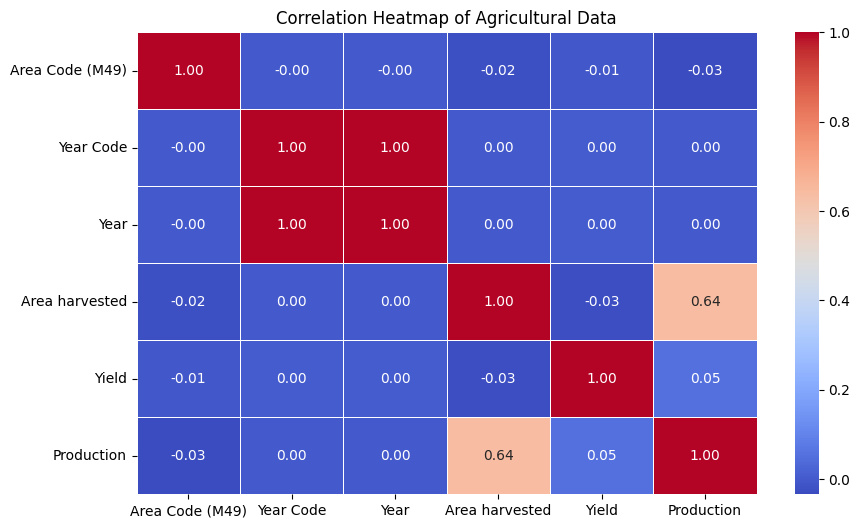

In [15]:
corr_matrix = df_cleaned[numerical_cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.5)

plt.title("Correlation Heatmap of Agricultural Data")
plt.show()

In [16]:
df_cleaned = df_cleaned[~(df_cleaned['Production'] == 0)]

In [17]:
df_cleaned["Item Code (CPC)"] = df_cleaned["Item Code (CPC)"].astype(int)
print(df_cleaned.dtypes)

Domain              object
Area Code (M49)      int64
Area                object
Item Code (CPC)      int32
Item                object
Year Code            int64
Year                 int64
Area harvested     float64
Yield              float64
Production         float64
dtype: object


In [18]:
#dropping year code since year code and year column are same
df_cleaned.drop('Year Code', axis=1, inplace=True)

In [19]:
df_cleaned

,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area harvested,Yield,Production
0,Crops and livestock products,4,Afghanistan,0,Grapes,2019,92084.4,10729.5,1112927.00
1,Crops and livestock products,4,Afghanistan,0,Grapes,2021,92084.4,10727.9,1019197.00
2,Crops and livestock products,4,Afghanistan,111,Wheat,2019,2334000.0,2095.1,4890000.00
3,Crops and livestock products,4,Afghanistan,111,Wheat,2020,2668000.0,1943.4,5185000.00
4,Crops and livestock products,4,Afghanistan,111,Wheat,2021,2046564.0,1963.1,4017657.00
...,...,...,...,...,...,...,...,...,...
92418,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2019,6382.0,993.2,6338.22
92419,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2020,6177.0,1034.3,6388.82
92420,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2021,6934.0,974.5,6757.73
92421,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2022,6388.0,912.5,5828.86


In [20]:
crop_distribution = df_cleaned['Item'].value_counts()
#To see the most produced crops
top_crops = crop_distribution.head(10)
top_crops

Item
Other vegetables, fresh n.e.c.                                  908
Tomatoes                                                        832
Maize (corn)                                                    823
Potatoes                                                        776
Cabbages                                                        737
Other fruits, n.e.c.                                            705
Onions and shallots, dry (excluding dehydrated)                 700
Cucumbers and gherkins                                          671
Carrots and turnips                                             652
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    642
Name: count, dtype: int64

In [21]:
# TO see the least Crops
least_crops= crop_distribution.head(10)
least_crops

Item
Other vegetables, fresh n.e.c.                                  908
Tomatoes                                                        832
Maize (corn)                                                    823
Potatoes                                                        776
Cabbages                                                        737
Other fruits, n.e.c.                                            705
Onions and shallots, dry (excluding dehydrated)                 700
Cucumbers and gherkins                                          671
Carrots and turnips                                             652
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    642
Name: count, dtype: int64

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_12024\4245647413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")


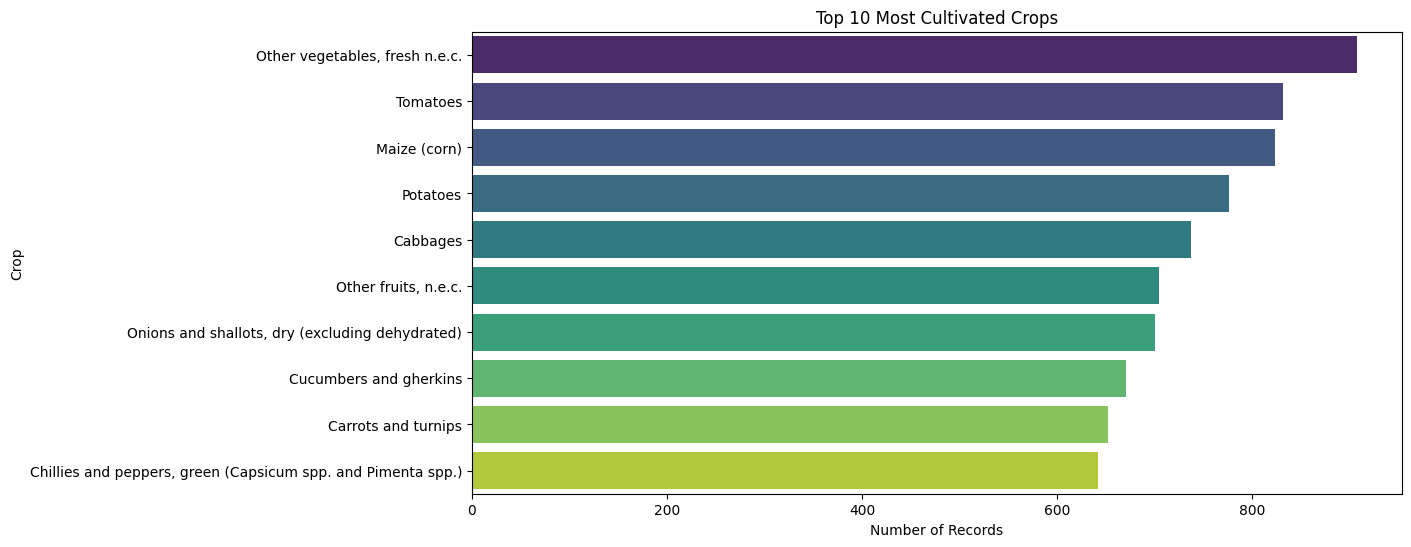

In [22]:
# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("Crop")
plt.title("Top 10 Most Cultivated Crops")
plt.show()

In [23]:
region_distribution = df_cleaned['Area'].value_counts()

# Display the top 10 regions with the most agricultural data
top_regions = region_distribution.head(10)

top_regions


Area
China                         600
China, mainland               585
Mexico                        545
Peru                          465
T�rkiye                       463
Morocco                       455
United States of America      441
Kenya                         423
Iran (Islamic Republic of)    410
Ecuador                       395
Name: count, dtype: int64

In [24]:
# Display the 10 regions with the least data
least_regions = region_distribution.tail(10)
least_regions

Area
Singapore           50
Niue                50
Iceland             35
Kiribati            30
Tuvalu              25
Tokelau             20
Malta               14
Faroe Islands        5
China, Macao SAR     5
Marshall Islands     5
Name: count, dtype: int64

C:\Users\Sai Krishnan\AppData\Local\Temp\ipykernel_12024\2912663583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")


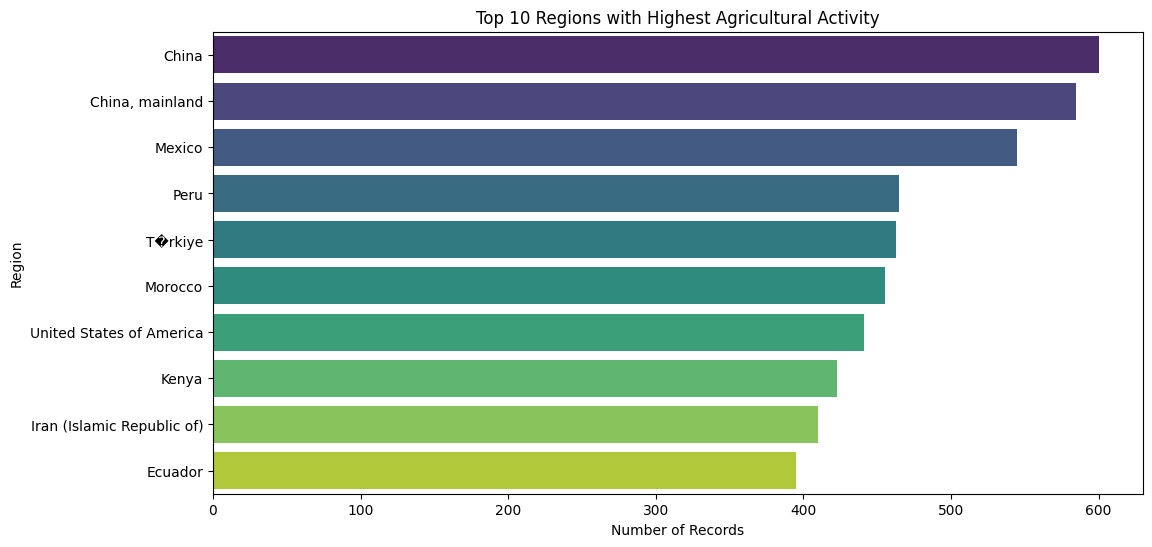

In [25]:
# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("Region")
plt.title("Top 10 Regions with Highest Agricultural Activity")
plt.show()

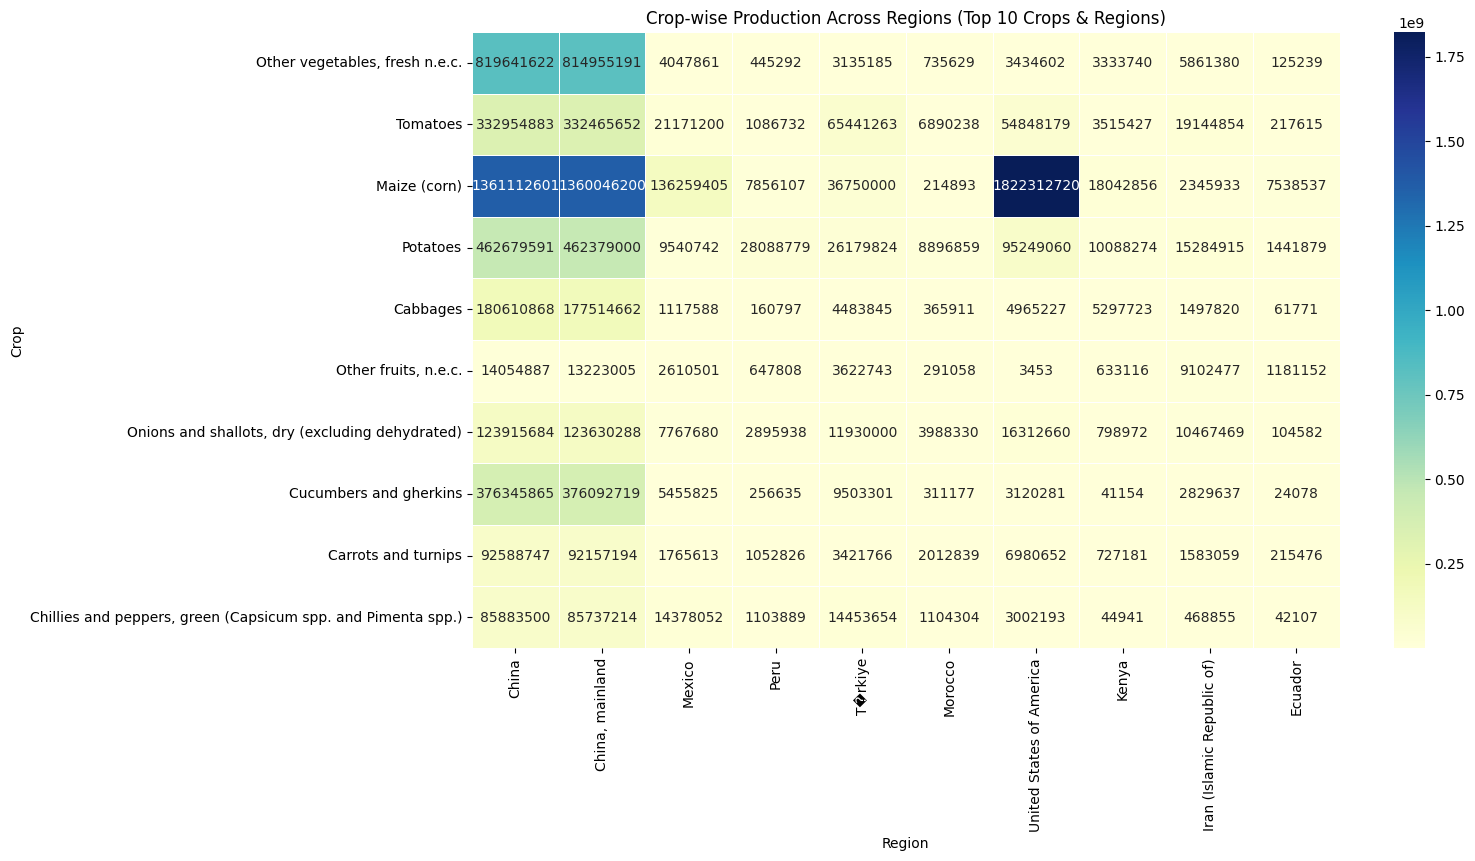

In [26]:
pivot = df_cleaned.pivot_table(index='Item', columns='Area', values='Production', aggfunc='sum', fill_value=0)
top_crops = df_cleaned['Item'].value_counts().head(10).index
top_regions = df_cleaned['Area'].value_counts().head(10).index
pivot = pivot.loc[top_crops, top_regions]

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Crop-wise Production Across Regions (Top 10 Crops & Regions)")
plt.xlabel("Region")
plt.ylabel("Crop")
plt.show()

In [27]:
yearly_trends = df_cleaned.groupby("Year")[["Area harvested", "Yield", "Production"]].sum()

# Display the aggregated data
yearly_trends

,Area harvested,Yield,Production
Year,,,
2019,1.597499e+09,1.117466e+08,1.110373e+10
2020,1.627572e+09,1.125056e+08,1.113022e+10
2021,1.649686e+09,1.139630e+08,1.132782e+10
2022,1.656904e+09,1.142017e+08,1.141717e+10
2023,1.672191e+09,1.146744e+08,1.169478e+10


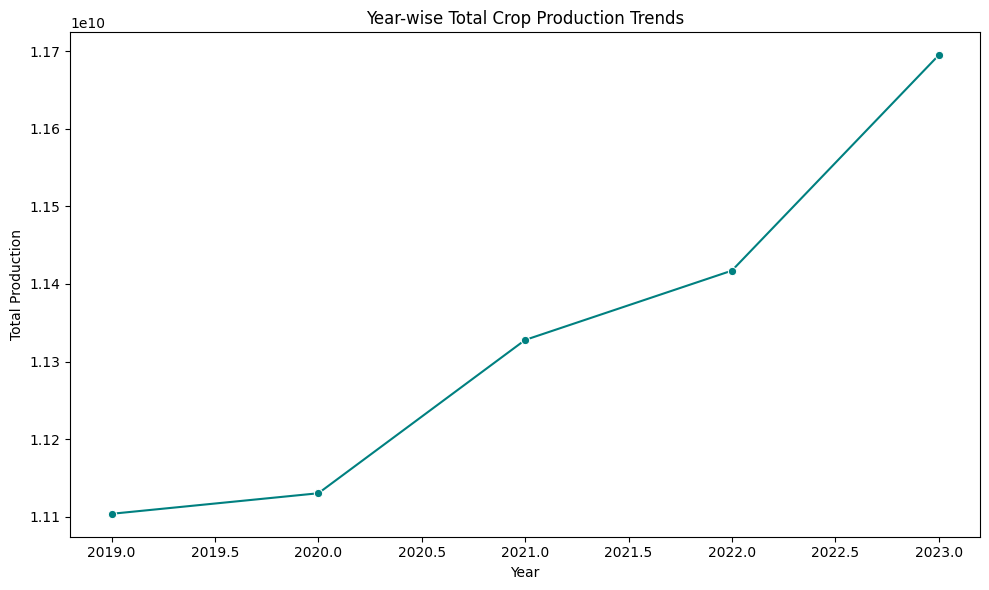

In [28]:
# Year-wise Production Trends 

# Group by Year and sum the Production for each year
yearly_production = df_cleaned.groupby('Year')['Production'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Production', data=yearly_production, marker='o', color='teal')
plt.xlabel("Year")
plt.ylabel("Total Production")
plt.title("Year-wise Total Crop Production Trends")
plt.tight_layout()
plt.show()

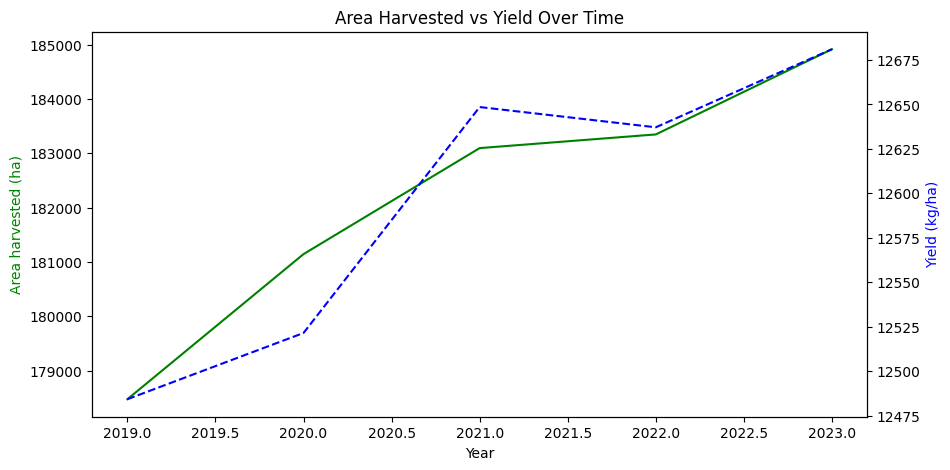

In [29]:
# Area Harvested vs Yield Over Time
import matplotlib.pyplot as plt

yearly = df_cleaned.groupby('Year')[['Area harvested', 'Yield']].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.plot(yearly.index, yearly['Area harvested'], 'g-', label='Area harvested')
ax2.plot(yearly.index, yearly['Yield'], 'b--', label='Yield')

ax1.set_xlabel('Year')
ax1.set_ylabel('Area harvested (ha)', color='g')
ax2.set_ylabel('Yield (kg/ha)', color='b')
plt.title('Area Harvested vs Yield Over Time')
plt.show()


In [30]:
crop_trends = df_cleaned.groupby(["Year", "Item"])[["Yield", "Production"]].sum().reset_index()

# Display the data
print(crop_trends.head())

   Year                                               Item      Yield  \
0  2019                            Abaca, manila hemp, raw     5019.8   
1  2019                          Agave fibres, raw, n.e.c.     5968.8   
2  2019                                  Almonds, in shell   129126.1   
3  2019  Anise, badian, coriander, cumin, caraway, fenn...    64842.1   
4  2019                                             Apples  1646887.1   

     Production  
0  1.095060e+05  
1  3.959024e+04  
2  3.674078e+06  
3  2.256726e+06  
4  1.298731e+08  


In [31]:

crop_yield = df_cleaned.groupby("Item")["Yield"].mean().reset_index()

# Sort crops by yield (highest to lowest)
crop_yield = crop_yield.sort_values(by="Yield", ascending=False)

In [32]:
# Display top and bottom crops
# Top 5 High-Yield Crops
crop_yield.head(5)



,Item,Yield
41,Cucumbers and gherkins,61021.826528
145,Tomatoes,60111.901683
138,Sugar cane,58181.027426
137,Sugar beet,49593.234276
45,Eggplants (aubergines),35312.324738


In [33]:
# Bottom 5 Low-Yield Crops
crop_yield.tail(5)

,Item,Yield
36,Cocoa beans,499.494138
58,Jojoba seeds,472.740000
64,Kola nuts,455.890000
119,"Pyrethrum, dried flowers",387.751429
150,"Vanilla, raw",343.235065


In [34]:
region_production = df_cleaned.groupby("Area")["Production"].sum().reset_index()

# Sort by highest production
region_production = region_production.sort_values(by="Production", ascending=False)

# Display top and bottom regions
print("📌 Top 5 Highly Productive Regions:")
print(region_production.head())

print("\n📌 Bottom 5 Low-Production Regions:")
print(region_production.tail())

📌 Top 5 Highly Productive Regions:
                         Area    Production
34                      China  9.127218e+09
38            China, mainland  9.088067e+09
83                      India  5.968086e+09
22                     Brazil  5.505432e+09
191  United States of America  3.516034e+09

📌 Bottom 5 Low-Production Regions:
                 Area  Production
179           Tokelau    25381.23
184            Tuvalu    20160.70
123             Nauru    14397.97
63      Faroe Islands     7606.56
36   China, Macao SAR     1098.63


In [35]:
avg_yield = df_cleaned.groupby(['Area', 'Item'])['Yield'].mean().reset_index()

# Sort by yield in descending order to see high yield values at the top
avg_yield_sorted = avg_yield.sort_values(by='Yield', ascending=False)
avg_yield_sorted.head(10)

,Area,Item,Yield
5709,Netherlands (Kingdom of the),Cucumbers and gherkins,659663.58
3765,Iceland,Cucumbers and gherkins,535121.34
8488,United Kingdom of Great Britain and Northern I...,Cucumbers and gherkins,514500.00
6057,Oman,Cucumbers and gherkins,513089.68
5711,Netherlands (Kingdom of the),Eggplants (aubergines),509871.80
738,Belgium,Tomatoes,468912.60
5734,Netherlands (Kingdom of the),Tomatoes,460221.74
715,Belgium,Eggplants (aubergines),450066.66
713,Belgium,Cucumbers and gherkins,427917.46
7769,Sweden,Tomatoes,421850.00


In [36]:
df_cleaned['Productivity Ratio'] = df_cleaned.apply(lambda row: row['Production'] / row['Area harvested'] if row['Area harvested'] > 0 else None, axis=1)

# Display the first few rows
df_cleaned[['Area', 'Item', 'Year', 'Production', 'Area harvested', 'Yield', 'Productivity Ratio']].head(10)

,Area,Item,Year,Production,Area harvested,Yield,Productivity Ratio
0,Afghanistan,Grapes,2019,1112927.0,92084.4,10729.5,12.085945
1,Afghanistan,Grapes,2021,1019197.0,92084.4,10727.9,11.068075
2,Afghanistan,Wheat,2019,4890000.0,2334000.0,2095.1,2.095116
3,Afghanistan,Wheat,2020,5185000.0,2668000.0,1943.4,1.943403
4,Afghanistan,Wheat,2021,4017657.0,2046564.0,1963.1,1.963123
5,Afghanistan,Wheat,2022,3802895.0,1859339.0,2045.3,2.045294
6,Afghanistan,Wheat,2023,4300000.0,2003070.0,2146.7,2.146705
7,Afghanistan,Maize (corn),2019,184671.0,94910.0,1945.7,1.945749
8,Afghanistan,Maize (corn),2020,271776.0,140498.0,1934.4,1.934376
9,Afghanistan,Maize (corn),2021,264314.0,139080.0,1900.4,1.900446


In [37]:
df_cleaned

,Domain,Area Code (M49),Area,Item Code (CPC),Item,Year,Area harvested,Yield,Production,Productivity Ratio
0,Crops and livestock products,4,Afghanistan,0,Grapes,2019,92084.4,10729.5,1112927.00,12.085945
1,Crops and livestock products,4,Afghanistan,0,Grapes,2021,92084.4,10727.9,1019197.00,11.068075
2,Crops and livestock products,4,Afghanistan,111,Wheat,2019,2334000.0,2095.1,4890000.00,2.095116
3,Crops and livestock products,4,Afghanistan,111,Wheat,2020,2668000.0,1943.4,5185000.00,1.943403
4,Crops and livestock products,4,Afghanistan,111,Wheat,2021,2046564.0,1963.1,4017657.00,1.963123
...,...,...,...,...,...,...,...,...,...,...
92418,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2019,6382.0,993.2,6338.22,0.993140
92419,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2020,6177.0,1034.3,6388.82,1.034292
92420,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2021,6934.0,974.5,6757.73,0.974579
92421,Crops and livestock products,894,Zambia,1708,"Bambara beans, dry",2022,6388.0,912.5,5828.86,0.912470


In [38]:

# Outliers and Anomalies in Yield

# Calculate IQR for Yield
Q1 = df_cleaned['Yield'].quantile(0.25)
Q3 = df_cleaned['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mark outliers
df_cleaned['Yield_Outlier'] = ((df_cleaned['Yield'] < lower_bound) | (df_cleaned['Yield'] > upper_bound))

# Show summary
print(f"Number of Yield outliers: {df_cleaned['Yield_Outlier'].sum()}")




Number of Yield outliers: 3311


# Predicting Production (Production, measured in tons):

In [39]:
df_cleaned.drop('Domain', axis=1, inplace=True)
df_cleaned.drop('Productivity Ratio', axis=1, inplace=True)

In [40]:
print(df_cleaned.dtypes)

Area Code (M49)      int64
Area                object
Item Code (CPC)      int32
Item                object
Year                 int64
Area harvested     float64
Yield              float64
Production         float64
Yield_Outlier         bool
dtype: object


In [41]:
df2=  pd.get_dummies(df_cleaned, columns=['Area', 'Item'], drop_first=True)

In [42]:
df_cleaned

,Area Code (M49),Area,Item Code (CPC),Item,Year,Area harvested,Yield,Production,Yield_Outlier
0,4,Afghanistan,0,Grapes,2019,92084.4,10729.5,1112927.00,False
1,4,Afghanistan,0,Grapes,2021,92084.4,10727.9,1019197.00,False
2,4,Afghanistan,111,Wheat,2019,2334000.0,2095.1,4890000.00,False
3,4,Afghanistan,111,Wheat,2020,2668000.0,1943.4,5185000.00,False
4,4,Afghanistan,111,Wheat,2021,2046564.0,1963.1,4017657.00,False
...,...,...,...,...,...,...,...,...,...
92418,894,Zambia,1708,"Bambara beans, dry",2019,6382.0,993.2,6338.22,False
92419,894,Zambia,1708,"Bambara beans, dry",2020,6177.0,1034.3,6388.82,False
92420,894,Zambia,1708,"Bambara beans, dry",2021,6934.0,974.5,6757.73,False
92421,894,Zambia,1708,"Bambara beans, dry",2022,6388.0,912.5,5828.86,False


In [43]:
print(df2.dtypes)

Area Code (M49)             int64
Item Code (CPC)             int32
Year                        int64
Area harvested            float64
Yield                     float64
                           ...   
Item_Walnuts, in shell       bool
Item_Watermelons             bool
Item_Wheat                   bool
Item_Yams                    bool
Item_Yautia                  bool
Length: 362, dtype: object


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define input & output variables
X = df2.drop(columns=['Production'])  # Features
y = df2['Production']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# 4. R-Squared (R2)
r2 = r2_score(y_test, y_pred)



In [46]:
# Get Evaluation Metrics
print(f"Mean Squared Error (MSE) : {mse}")
print(f"Mean Absolute Error (MAE) : {mae}")
print(f"Root Mean Squared Error (RMSE) : {rmse}")
print(f"R2 Score : {r2}")

Mean Squared Error (MSE) : 131865634274430.64
Mean Absolute Error (MAE) : 1738950.8310935036
Root Mean Squared Error (RMSE) : 11483276.286601774
R2 Score : 0.30625834455707635


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [48]:
# Get results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

R² Score: 0.9834
Mean Squared Error (MSE): 3156728848351.0166
Mean Absolute Error (MAE): 62650.0812


In [49]:
import joblib
X_encoded = pd.get_dummies(X)

# Save the final feature columns (after encoding)
joblib.dump(X_encoded.columns.tolist(), "feature_columns.pkl")

# Train and save the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

joblib.dump(model, "rf_model_1.pkl")

Note: you may need to restart the kernel to use updated packages.


['rf_model_1.pkl']

In [50]:
df_cleaned.to_csv("df_cleaned.csv", index=False)